# Quickstart

In [1]:
import matplotlib.pyplot as plt

from genesis.version4 import Genesis4

import genesis.version4 as g4

%config InlineBackend.figure_format = 'retina' # Nicer plots

## Load an existing main input file and run Genesis4

Load a pre-existing Genesis 4 main input file - "Example 1: Steady State" from Sven's documentation. The lattice file will be determined automatically from its `&setup` namelist.

In [2]:
G = Genesis4("data/example1-steadystate/Example1.in")
G.verbose = True

In [3]:
output = G.run()

Configured to run in: /var/folders/vy/s8_hc3m10fddm6n_43cf_m8r0000gn/T/tmpuorzhit3
Running Genesis4 in /var/folders/vy/s8_hc3m10fddm6n_43cf_m8r0000gn/T/tmpuorzhit3
/Users/klauer/miniforge3/envs/lume-genesis/bin/genesis4 -l Example1.lat genesis4.in
---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by runner at 2024-01-11 18:10:26 [UTC] from Git Commit ID: 
Starting Time: Wed Jun  5 14:49:39 2024

MPI-Comm Size: 1 node

Opened input file genesis4.in
Parsing lattice file Example1.lat ...
Matching for periodic solution between z = 0 and z = 9.5 :
   betax (m) : 8.53711
   alphax    : -0.703306
   phix (deg): 45.818
   betay (m) : 17.3899
   alphay    : 1.40348
   phiy (deg): 45.818
Generating input radiation field for HARM = 1 ...
Generating input particle distribution...

Running Core Simulation...
Steady-state run
Initial analysis of electron beam and radiation field...
  Calculation: 0% done
  Calculation: 10% done
  Calculation:

<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

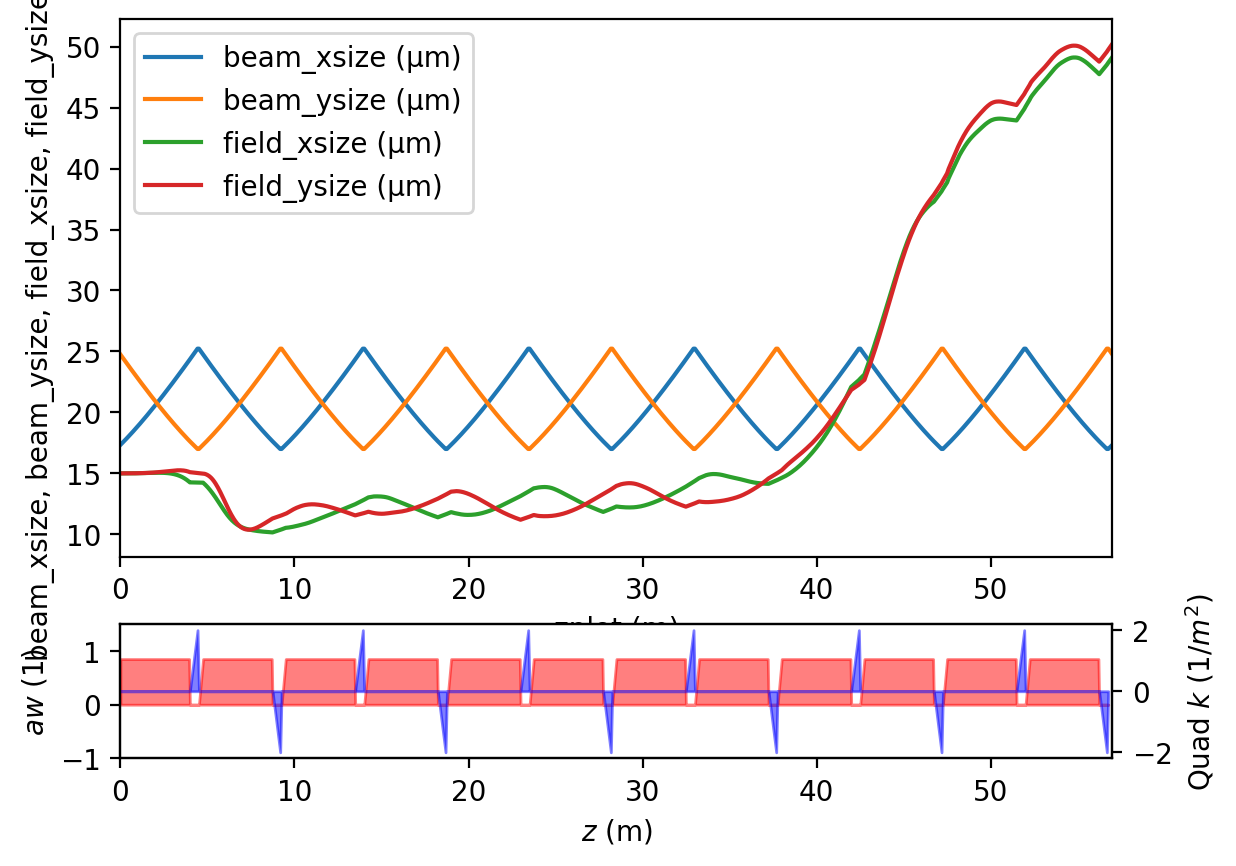

In [4]:
G.plot(["beam_xsize", "beam_ysize", "field_xsize", "field_ysize"])

## Inspect the output

### Lattice plot

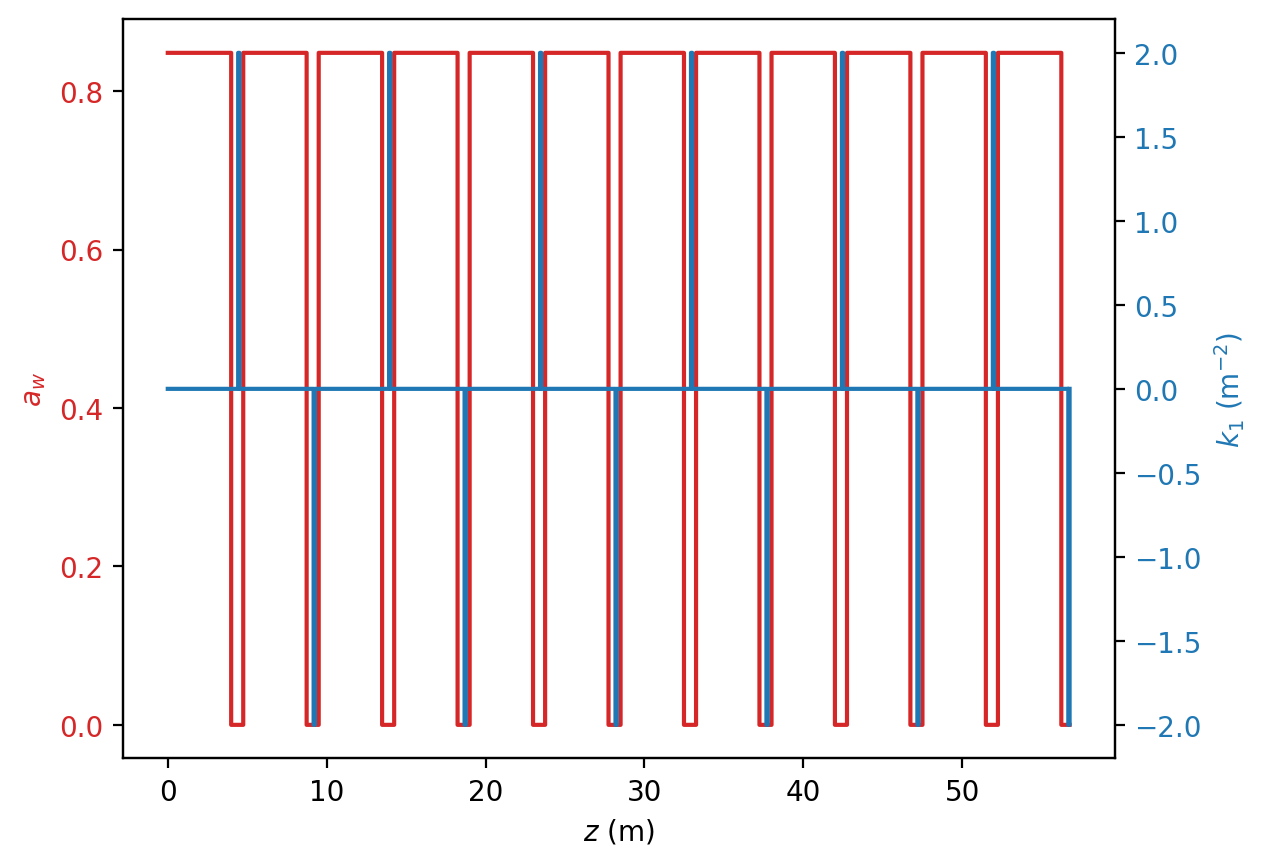

In [5]:
z = output.lattice.z

fig, ax1 = plt.subplots()
color = "tab:red"
ax1.set_xlabel(r"$z$ (m)")
ax1.set_ylabel(r"$a_w$", color=color)
ax1.tick_params(axis="y", labelcolor=color)
ax1.step(z, output.lattice.aw, color=color, where="post")

ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel(r"$k_1$ (m$^{-2}$)", color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.step(z, output.lattice.qf, color=color, where="post")
plt.show()

### Beam and field sizes

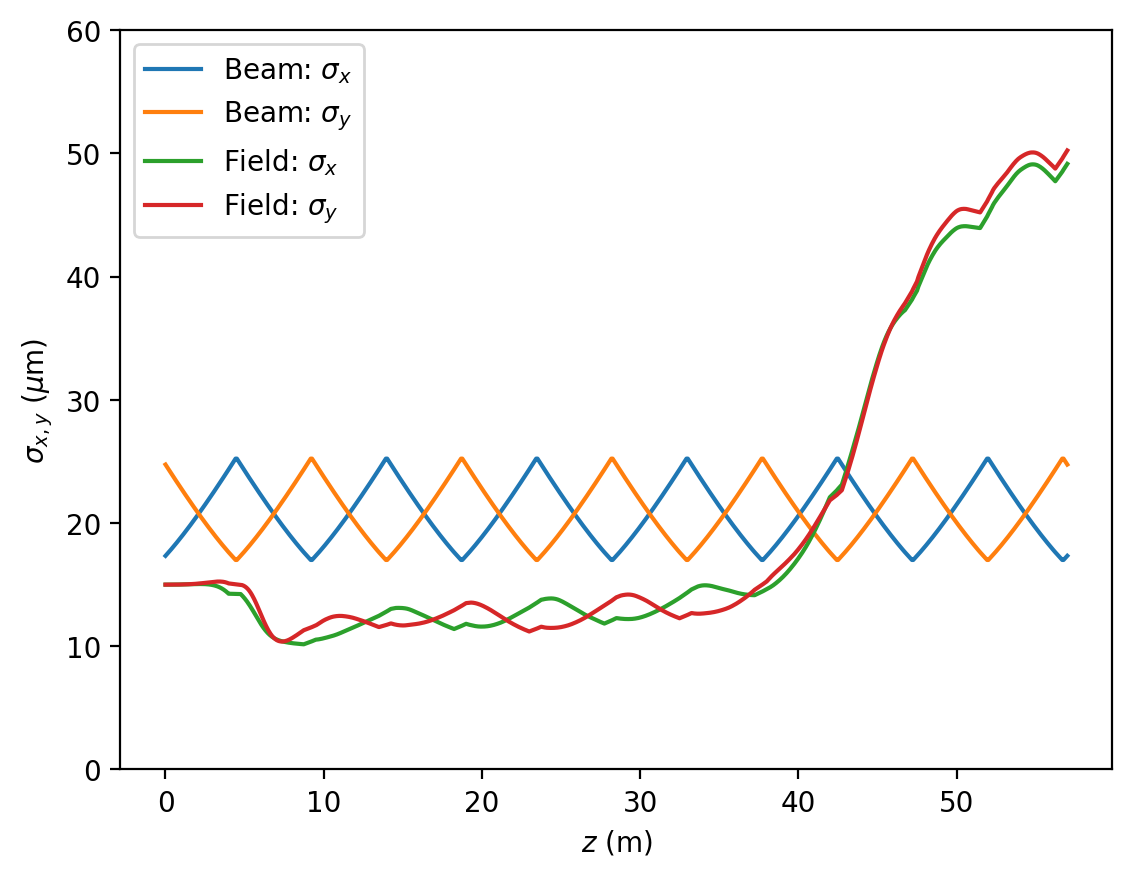

In [6]:
zplot = output.lattice.zplot
field_info = output.field_info
plt.plot(zplot, output.beam.xsize * 1e6, label=r"Beam: $\sigma_x$")
plt.plot(zplot, output.beam.ysize * 1e6, label=r"Beam: $\sigma_y$")
plt.plot(zplot, field_info.xsize * 1e6, label=r"Field: $\sigma_x$")
plt.plot(zplot, field_info.ysize * 1e6, label=r"Field: $\sigma_y$")
plt.legend()
plt.xlabel(r"$z$ (m)")
plt.ylabel(r"$\sigma_{x,y}$ ($\mu$m)")
plt.ylim([0, 60])
plt.show()

## Make your own input

This section replicates the above Genesis 4-format input entirely in Python.

In [7]:
main = g4.MainInput(
    [
        g4.Setup(
            rootname="Example1",
            beamline="FEL",
            gamma0=11357.82,
            delz=0.045,
            nbins=8,
            shotnoise=False,
        ),
        g4.LatticeNamelist(zmatch=9.5),
        g4.Field(power=5000.0, waist_size=3e-05, dgrid=0.0002, ngrid=255),
        g4.Beam(delgam=1.0, current=3000.0, ex=4e-07, ey=4e-07),
        g4.Track(),
    ],
)

lattice = g4.Lattice(
    {
        "D1": g4.Drift(L=0.44),
        "D2": g4.Drift(L=0.24),
        "FEL": g4.Line(elements=["FODO"] * 6),
        "FODO": g4.Line(
            elements=["UND", "D1", "QF", "D2", "UND", "D1", "QD", "D2"],
        ),
        "QD": g4.Quadrupole(L=0.08, k1=-2.0),
        "QF": g4.Quadrupole(L=0.08, k1=2.0),
        "UND": g4.Undulator(aw=0.84853, lambdau=0.015, nwig=266, helical=True),
    }
)

In [8]:
G = Genesis4(main, lattice)
G.verbose = True

In [9]:
output = G.run()

Configured to run in: /var/folders/vy/s8_hc3m10fddm6n_43cf_m8r0000gn/T/tmpjke4_t4c
Running Genesis4 in /var/folders/vy/s8_hc3m10fddm6n_43cf_m8r0000gn/T/tmpjke4_t4c
/Users/klauer/miniforge3/envs/lume-genesis/bin/genesis4 -l genesis.lat genesis4.in
---------------------------------------------
GENESIS - Version 4.6.6 has started...
Compile info: Compiled by runner at 2024-01-11 18:10:26 [UTC] from Git Commit ID: 
Starting Time: Wed Jun  5 14:49:44 2024

MPI-Comm Size: 1 node

Opened input file genesis4.in
Parsing lattice file genesis.lat ...
Matching for periodic solution between z = 0 and z = 9.5 :
   betax (m) : 8.53711
   alphax    : -0.703306
   phix (deg): 45.818
   betay (m) : 17.3899
   alphay    : 1.40348
   phiy (deg): 45.818
Generating input radiation field for HARM = 1 ...
Generating input particle distribution...

Running Core Simulation...
Steady-state run
Initial analysis of electron beam and radiation field...
  Calculation: 0% done
  Calculation: 10% done
  Calculation: 2

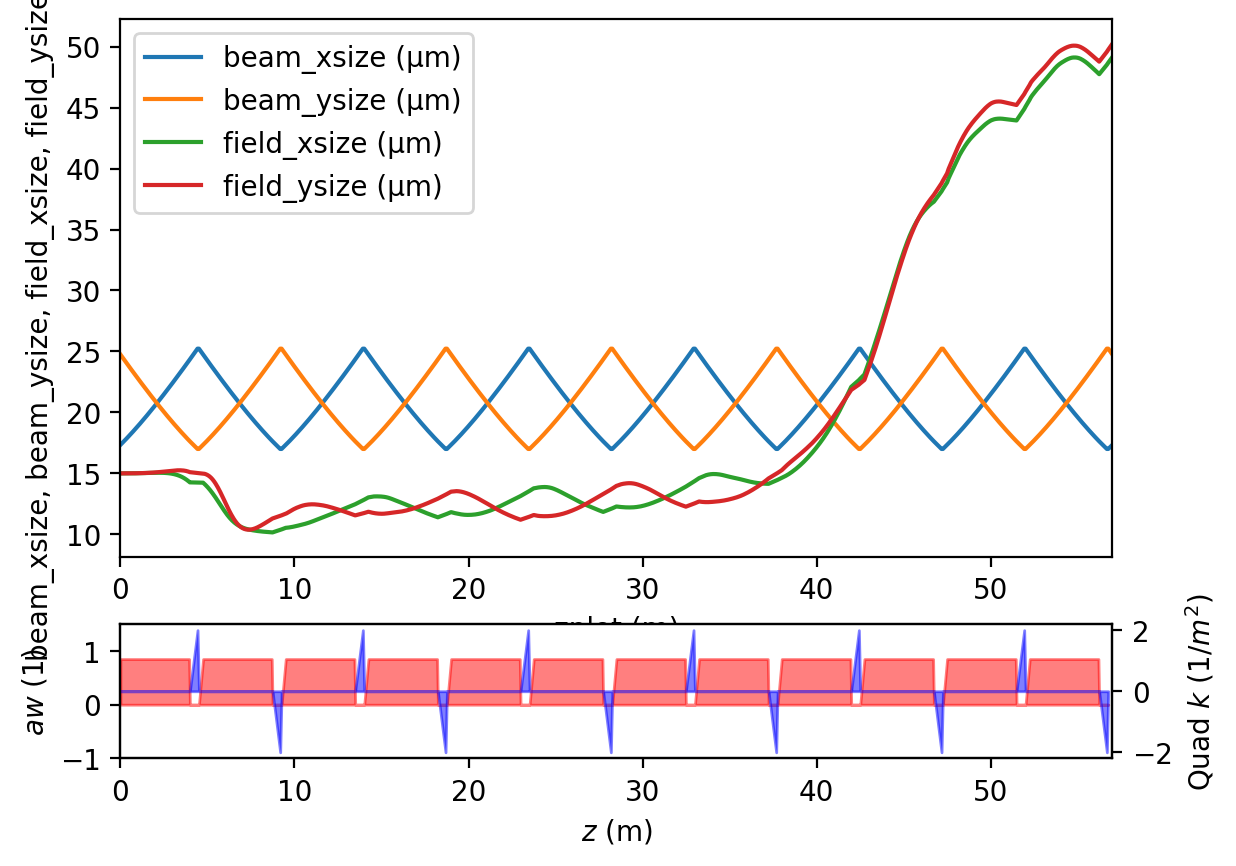

In [10]:
G.plot(["beam_xsize", "beam_ysize", "field_xsize", "field_ysize"])

## View available output data

In [11]:
output.info()

Key,Units,Shape,Description
alphax,rad,"(1, 1)",Twiss alpha horizontal. Evaluated only at the beginning. [rad]
alphay,rad,"(1, 1)",Twiss alpha vertical. Evaluated only at the beginning. [rad]
aw,,"(1104,)","The dimensionless rms undulator parameter. For planar undulator this value is smaller by a factor $1 / \sqrt{2}$ than its K-value, while for helical undulator rms and peak values are identical."
ax,m,"(1104,)",Offset of the undulator module in $x$ in meter.
ay,m,"(1104,)",Offset of the undulator module in $y$ in meter.
beam_alphax,rad,"(1, 1)",Twiss alpha horizontal. Evaluated only at the beginning. [rad]
beam_alphay,rad,"(1, 1)",Twiss alpha vertical. Evaluated only at the beginning. [rad]
beam_betax,m,"(1, 1)",Twiss beta horizontal. Evaluated only at the beginning. [m]
beam_betay,m,"(1, 1)",Twiss beta vertical. Evaluated only at the beginning. [m]
beam_bunching,,"(1105, 1)",Evaluated at each integration step. [unitless]


In [12]:
output["beam_energy"]

array([[5.80383409e+09],
       [5.80383409e+09],
       [5.80383409e+09],
       ...,
       [5.80353020e+09],
       [5.80353020e+09],
       [5.80353020e+09]])

## Archive the results to an HDF5 file

In [13]:
G.archive("quickstart-results.h5")

In [14]:
restored = Genesis4.from_archive("quickstart-results.h5")

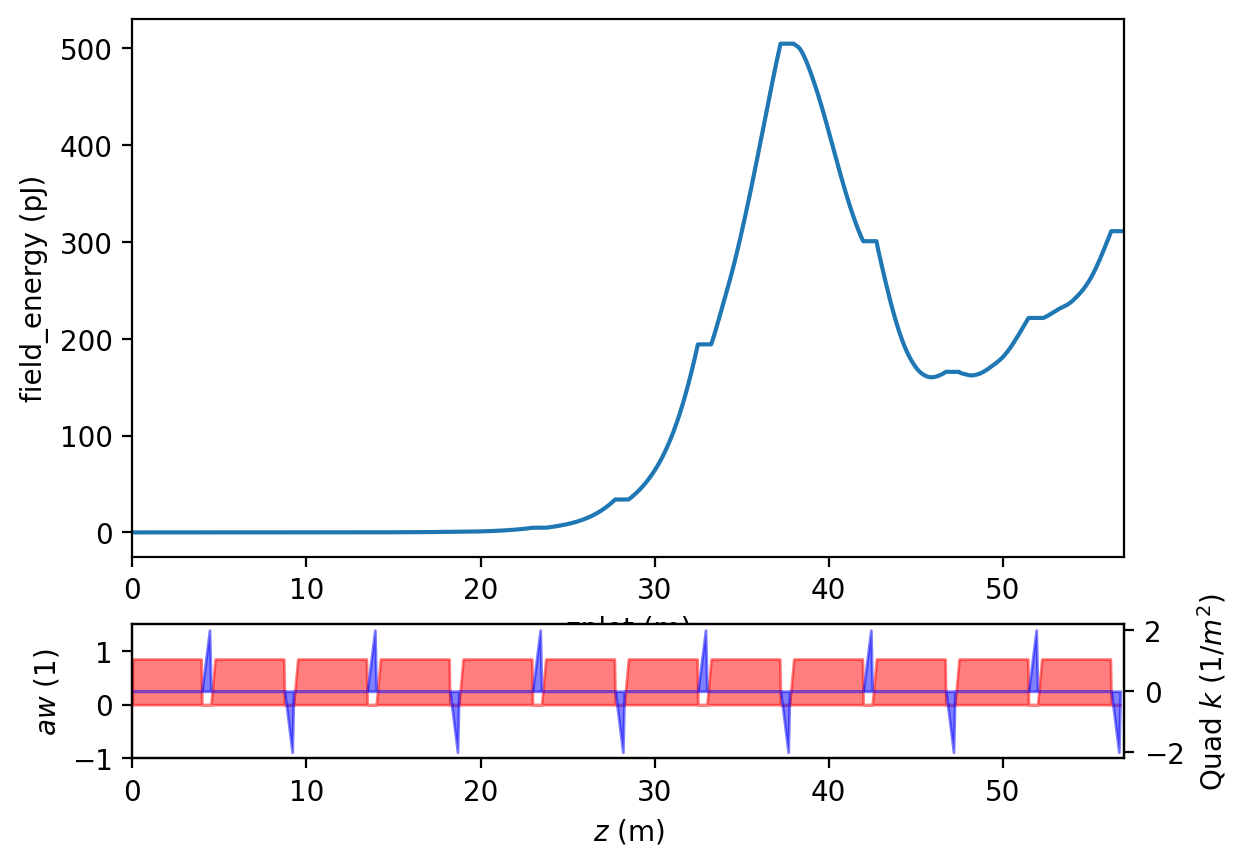

In [15]:
restored.output.plot()

In [16]:
G == restored

True